# Fake news Detection

In [1]:
# imports
import pandas as pd 
import re
import string
import matplotlib.pyplot as plt

## Treating / process the dataset

In [2]:
# read csv from the DATA file
df = pd.read_csv("./Data/news-dataSet.csv")

# Show CSV head
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#show csv shape
df.shape

(6335, 4)

In [4]:
# show csv columns
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
# show Empty values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
# rename column "Unnamed: 0" to "reference"
df.columns = df.columns.str.replace('Unnamed: 0', 'reference')
df.columns

Index(['reference', 'title', 'text', 'label'], dtype='object')

<AxesSubplot: >

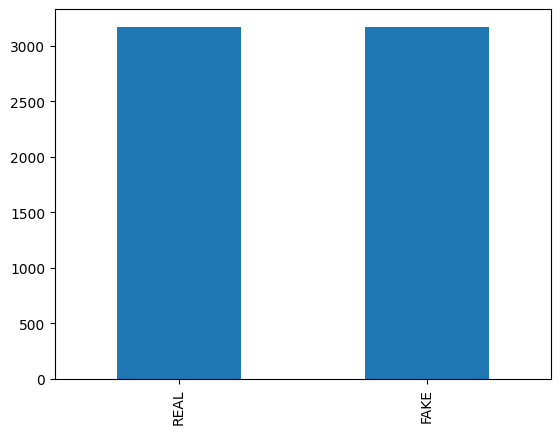

In [7]:
# Count number of FAKE and REAL news
df.label.value_counts().plot.bar()

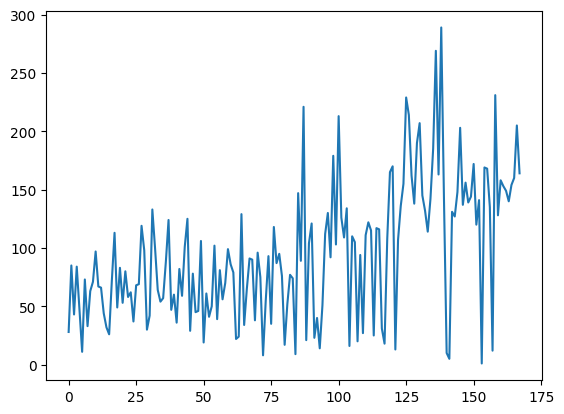

In [8]:
df.title.str.len().max()
# titles length size 
plt.plot(df.title.str.len().unique())

In [9]:
#concaténation de la colonne title et text
df['content']=df['title']+['text']
print(df['content'])

0                        You Can Smell Hillary’s Feartext
1       Watch The Exact Moment Paul Ryan Committed Pol...
2         Kerry to go to Paris in gesture of sympathytext
3       Bernie supporters on Twitter erupt in anger ag...
4       The Battle of New York: Why This Primary Matte...
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: content, Length: 6335, dtype: object


In [10]:
# Création de la fonction qui convertit le text en miniscule
def miniscule(text):
    text = text.lower()  
    return text

In [11]:
#application de la fonction sur la colonne "content"
df["content"] = df["content"].apply(miniscule)
print(df["content"])

0                        you can smell hillary’s feartext
1       watch the exact moment paul ryan committed pol...
2         kerry to go to paris in gesture of sympathytext
3       bernie supporters on twitter erupt in anger ag...
4       the battle of new york: why this primary matte...
                              ...                        
6330    state department says it can't find emails fro...
6331    the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332    anti-trump protesters are tools of the oligarc...
6333    in ethiopia, obama seeks progress on peace, se...
6334    jeb bush is suddenly attacking trump. here's w...
Name: content, Length: 6335, dtype: object


In [12]:
#Création de la fonction qui supprime les extra space, special caractères , url and links.
def replace(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text 


In [13]:
#application de la fonction sur la colonne "content"
df["content"] = df["content"].apply(replace)
print(df["content"])

0                        you can smell hillary s feartext
1       watch the exact moment paul ryan committed pol...
2         kerry to go to paris in gesture of sympathytext
3       bernie supporters on twitter erupt in anger ag...
4       the battle of new york  why this primary matte...
                              ...                        
6330    state department says it can t find emails fro...
6331    the  p  in pbs should stand for  plutocratic  ...
6332    anti trump protesters are tools of the oligarc...
6333    in ethiopia  obama seeks progress on peace  se...
6334    jeb bush is suddenly attacking trump  here s w...
Name: content, Length: 6335, dtype: object


In [14]:
# separate content and label
X = df['content']
Y = df['label']

print (X.head(3)) # X-> content
print (Y.head(3)) # Y-> label

0                     you can smell hillary s feartext
1    watch the exact moment paul ryan committed pol...
2      kerry to go to paris in gesture of sympathytext
Name: content, dtype: object
0    FAKE
1    FAKE
2    REAL
Name: label, dtype: object


In [15]:
# Show Empty values in each table
print("Empty values for X:" , X.isnull().sum())
print("Empty values for Y:" , Y.isnull().sum())

Empty values for X: 0
Empty values for Y: 0


## DataSet Division

In [18]:
!pip3 install -U scikit-learn

  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [20]:
from sklearn.model_selection import train_test_split

# Split 80% train 20% test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state=7)

ModuleNotFoundError: No module named 'sklearn'

In [28]:
#instanciation du TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words='english',max_df=0.7)

ModuleNotFoundError: No module named 'sklearn'

## 0.passive agreesive classifier 

In [ ]:
#passive agreesive classifier 
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pac=Pipeline([
    ('linear',vectorization),
    ('pc_clf',PassiveAggressiveClassifier(max_iter=50))
])

pac.fit(x_train,y_train)

#Predict on the test set and calculate accuracy

pac_pred=pac.predict(x_test)
pacscore=pac.score(y_test,pac_pred)
print(f"Test Set Accuracy : {accuracy_score(y_test, pac_pred) * 100} %\n\n") 

Test Set Accuracy : 0.0 %




In [21]:
#Imprimons la matrice de confusion pour mieux comprendre le nombre de faux et de vrais négatifs et positifs.
#Création de la matrice de confusion
confusion_matrix(y_test,pac_pred, labels=['FAKE','REAL'])

NameError: name 'confusion_matrix' is not defined

TODO:
 - Verify why the set accuracy return 0.0% ( result unnormal)
 - Create a confusion matrix for a better visualisation of the negatif and positif values ( of the real and fake)
 - verify the actual code to commit into " Correct code" 


In [ ]:
#enregistrement du model sur le disque
model_file_pac='final_model_pac.sav'
pickle.dump(pac,open(model_file_pac,'wb'))#serialization:on enregistre les donnes en flux d'octetes sur le fichier final_model

In [22]:
import pickle

#function to run for prediction
def detecting_fake_news_pac(var):
    
    #récupération du modèle pour l’appel de prévision
    load_model_pac=pickle.load(open('final_model_pac.sav','rb')) #deserialization:on lit a partir du fichier final_model
    prediction_pac=load_model_pac.predict([var])#calcul du prediction de la nouvelle entrée en paramétre selon notre model
    
    return (prediction_pac[0])

## 1. Logistic Regression Classifier

In [23]:
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'sklearn'

In [24]:
LR=Pipeline([
    ('linear',vectorization),
    ('lr',LogisticRegression())
])

LR.fit(x_train,y_train)

# Predict on the test set and calculate accuracy
LR_pred=LR.predict(x_test)
LRscore=LR.score(y_test,LR_pred)
print(f"Test Set Accuracy : {accuracy_score(y_test, LR_pred) * 100} %\n\n")

NameError: name 'Pipeline' is not defined

In [25]:
#Creation de la matrice du confusion 
confusion_matrix(y_test,LR_pred, labels=['FAKE','REAL'])

NameError: name 'confusion_matrix' is not defined

In [ ]:
#enrgistrement du  model
model_file_LR='final_model_LR.sav'
pickle.dump(LR,open(model_file_LR,'wb'))#serialization:on enregistre les donnes en flux d'octetes sur le fichier final_model

In [26]:
import pickle


#function to run for prediction
def detecting_fake_news_LR(var):
    
    #récupération du modèle pour l’appel de prévision
    load_model_LR=pickle.load(open('final_model_LR.sav','rb')) #deserialization:on lit a partir du fichier final_model
    prediction_LR=load_model_LR.predict([var])#calcul du prediction de la nouvelle entré en paramétre selon notre model
    
    return (prediction_LR[0])